#Loading Libraries

In [ ]:
import re
#pretrained vector embedding
from gensim.models import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Loading the FastText model

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 2.3 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3145177 sha256=29ee1d4b4ab0e4a9945fd1d62eada07b0e03ea7df54ac3d364aeddaa2680591f
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:

#Using FastText Pretrained embeddings
import fasttext.util 
#Loading Binary version of Embedding
ft = fasttext.load_model('/content/drive/MyDrive/MDH_Finale/cc.sa.300.bin')


#Pre-Processing
###Removing stopwords,special characters,devanagiri numericals,and other unnesscary symbols

In [ ]:
#Opening of Sanskrit Document/Corpus
with open('/content/doc.txt','r') as file:
  Sans_text=file.read().replace('\n','')

In [ ]:
#These stopwords are taken from : 2017 IEEE 7th International Advance Computing Conference (IACC) paper consisting of 75 words 

stopwords="अंतः अत्र अथ अपि अयं अयम् अस्ति अस्मि अस्य अहं अहम् आम् इति इदं इदम् इमे इयं इयम् एतत् एतद् एते एवं एवं एष एषा कं कः कथं का कानि किं किम् कुत्र के क्वचित् खलु च तं ततः तत् तत्र तदा तनि तव तस्य तस्याः तु ते तेन तौ त्वम् न नु नो ननु परन्तु मम मा मे य यत् यंत्र यथा यदा यदि युयं येन वयं वा स सः सह सा स्म हि ॥ '' ``"
stopwords_list=word_tokenize(stopwords)
print(len(stopwords_list))

78


In [ ]:
def Preprocess(Raw_Doc):
  Sans_text1=re.sub(r'\s+', ' ', Raw_Doc, flags=re.I)
  #print(Sans_text1)
  string = re.sub(r'([a-zA-Z])[@31!]+(?=[a-zA-Z])', r'\1', Sans_text1)
  Sanstext2_1=word_tokenize(string)
  text_no_sw = [word for word in Sanstext2_1 if not word in stopwords_list]
  print(Sanstext2_1,"\n",text_no_sw)
  sans_string = (" ").join(text_no_sw)
  Sanstext2=re.split(r',|।', sans_string)
  Sanstext2_1=[i.strip() for i in Sanstext2 if len(i.strip())>8]
  return(Sanstext2_1)
Sentence_list=Preprocess(Sans_text)
summary_size=len(Sentence_list)/5
print(summary_size)
Sentence_list[0]

['रघुवंशं', 'महाकविकालिदासेन', 'विरचितं', 'किञ्चन', 'महाकाव्यमस्ति।', 'तत्', 'एकोनविंशति-सर्गात्मकं', 'लालित्यपूर्णं', 'महाकाव्यम्', '।', 'रघुवंशस्य', 'कथावस्तु', 'सूर्यवंशस्य', 'राज्ञां', 'वर्णनाधारितम्', 'अस्ति', '।', 'दशमसर्गादारभ्य', 'पञ्चदशसर्गपर्यन्तं', 'रामस्य', 'कथा', 'वर्णिता', 'अस्ति।', 'तदुतरं', 'रामवंश्यानां', 'ततन्नृपाणां', 'चरितानि', 'उपन्यस्तानि।', 'अन्तिमः', 'सर्गः', 'अग्निवर्णस्य', 'गर्भवत्याः', 'महाराज्याः', 'शासनाचरणेन', 'समं', 'समाप्यते।', 'कालिदासः', 'अग्निवर्णपरवर्तिनां', 'राज्ञाम्', 'अपि', 'वर्णनं', 'चिकीर्षति', 'स्म', ',', 'परम्', 'असौ', 'कालेन', 'कवलीकृतः', 'इति', 'किंवदन्ती।', 'तथा', 'च', 'कालिदासेन', 'परतः', 'अपि', 'रघुवंशस्य', 'सर्गाः', 'लिखिताः', ';', 'परन्तु', 'ते', 'न', 'प्राप्यन्ते', 'इत्यपि', 'प्रसिद्धिः।', 'रघुवंशे', 'येषां', 'राज्ञां', 'वर्णनानि', 'सन्ति', ',', 'तेषां', 'रामायणवर्णितनपैः', 'सह', 'भेदः', 'आपतति', ',', 'परन्तु', 'वायुपुराण-वर्णितानुसारं', 'रामवंशावल्या', 'सह', 'रघुवंशवर्णित-वंशावली', 'भूयसा', 'सामञ्जस्यं', 'धारयति।रघुवंशं', 'सूर्यकुलोत्

'रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति'

#Sentence Embedding 

In [ ]:
#Obtain Sentence embeddings by taking of word wbwddings qith respect to each sentence
def get_Sent_embeddings(Doc):
  Sentence_Embeddings_graph=[]
  Sentence_Embeddings_kmeans=[]
  word_embedds=[]
  c=0;
  for i in Doc:
    w_list=(word_tokenize(i))
    sen_len=len(w_list)
    sen_en=[]
    for j in w_list:
      embedd=ft.get_word_vector(j)
      
      sen_en.append(embedd)
      
      #print(len(sen_en),len(embedd))
      #word_embedds.append((j,embedd))
    sen_en=sum(sen_en)
    
    sen_en=[x / sen_len for x in sen_en] #Taking Average of word embeddings
    #print(i,len(sen_en))
    
    Sentence_Embeddings_graph.append((c,sen_en))
    Sentence_Embeddings_kmeans.append(sen_en)
    c=c+1
  #print(len(word_embedds))
  #print("Sentence Embeddings:",Sentence_Embeddings)
  return(Sentence_Embeddings_graph,Sentence_Embeddings_kmeans)
Sen_embedd_textrank,Sen_embedd_kmeans=get_Sent_embeddings(Sentence_list)
print(len(Sen_embedd_textrank))

414


#Approach 1 K-means CLustering

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
import operator

n_clusters = 2
kmeans = KMeans(n_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Sen_embedd_kmeans)

print(len(y_kmeans))


414


In [ ]:
from scipy.spatial import distance
sentence_sum=""
for i in range(n_clusters):
    my_dict={}
    
    for j in range(len(y_kmeans)):
        
        if y_kmeans[j]==i:
            my_dict[j] =  distance.cosine(kmeans.cluster_centers_[i],Sen_embedd_kmeans[j])
#print(sorted(my_dict.values(),reverse=True),sorted(my_dict))
my_sorted_list=(sorted(my_dict.items(), key=operator.itemgetter(1),reverse=True))
print(my_sorted_list)
for i in range(0,15):
  K=my_sorted_list[i][0]
  sentence_sum=sentence_sum+(Sentence_list[K])+" । "
print(sentence_sum)
                            

[(266, 0.251280815482525), (172, 0.16695212941608717), (269, 0.16133435782680783), (210, 0.11918377085987608), (364, 0.09370029165091143), (412, 0.09370029165091143), (167, 0.08621276764524377), (299, 0.07097067071189744), (176, 0.06388819864116968), (79, 0.0558621647907489), (304, 0.053095003129529306), (194, 0.05293496999137348), (150, 0.04492939861302825), (282, 0.04279421615410306), (212, 0.029230268086386846)]
अत एव हे मघवन् ! पितुः अश्वमेधयज्ञस्य प्रधानसाधनम् अश्वं देहि । राजन् ! त्वं विवेकहीनः प्रतिभासि । अये|राजकुमार ! सत्यमुक्तं त्वया । हे पुत्र ! दुग्धं पलाशनिर्मिते पात्रे दुग्ध्वा पिब इति । हे सूक्ष्मबुद्धे ब्रह्मन् ! रविः अन्धकारान्धं लोकं प्रकाशेन उद्बोधयति । हे सूक्ष्मबुद्धे ब्रह्मन् ! रविः अन्धकारान्धं लोकं प्रकाशेन उद्बोधयति । हे सिंह ! जडचेतनानाम् उत्पत्तिप्रलयसंहारहेतुः शिवः माननीयः । हे राजकुमार ! यतः पर्वतपक्षान् विभक्तवान् । हे प्रजानाथ ! त्वं मह्यं निजशरीरम् अदत्त्वा प्रतिगच्छसि । हे ऋषे ! भवतः आशीर्वादेन राज्य-प्रजा-सम्पतयः सुरक्षिताः । हे इन्द्र ! अश्वप्रत्यप्रण

#Approach 2 Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([[1, 0, -1]], [[-1,-1, 0]])

array([[-0.5]])

In [ ]:
print(Sen_embedd_textrank)
print(len(Sen_embedd_textrank[1]))

[(0, [-0.017276087775826454, -0.011353399604558945, -0.006678480189293623, 0.0011800788342952728, -0.0016104272799566388, -0.03296790271997452, 0.01830175518989563, -0.04487581551074982, 0.0015446613542735577, -0.006776206661015749, 0.001258290372788906, -0.06639809906482697, 0.0015685651451349258, 0.014410225674510002, 0.010358713567256927, 0.0710788369178772, -0.010881656780838966, 0.030758168548345566, 0.0029798890464007854, 0.013261343352496624, -0.0028862925246357918, -0.043136611580848694, 0.021142836660146713, 0.007910038344562054, -0.0014046328142285347, -0.03271584212779999, -0.0451461486518383, 0.0074973683804273605, 0.020349562168121338, -0.0027910107746720314, -0.004145551472902298, -0.007797776721417904, 0.027658745646476746, -0.029777592048048973, 0.0031554889865219593, -0.009451763704419136, 0.032806795090436935, -0.0011775451712310314, -0.0060843657702207565, 0.03866923600435257, -0.04522669315338135, -0.02317511849105358, -0.027603620663285255, -0.00035703135654330254,

In [ ]:

# Calculates cosine similariy between  each Sentence Embedding Vector Pair and creates Similarity Matrix
import itertools
import numpy as np
def similarity_Mattrix(sentence_mat_dim,Sentence_embedd,word_embeddings=0):
  sim_mat=np.zeros((sentence_mat_dim,sentence_mat_dim))

  print(len(sim_mat))
  for a, b in itertools.combinations(Sentence_embedd, 2):
    #A_idx=[Sentence_embedd.index(a)]
    #B_idx=[Sentence_embedd.index(b)]
    
    A_idx=a[0]
    B_idx=b[0]
    Cos_sim=cosine_similarity([a[1]],[b[1]])
    sim_mat[A_idx][B_idx]=Cos_sim
    sim_mat[B_idx][A_idx]=Cos_sim
    
    '''for c,d in itertools.combinations(word_embeddings,1):
      Cos_sim=cosine_similarity([c[1]],[d[1]])
      C_idx=a[0]
      D_idx=b[0]
      wordSim_mat[C_idx][D_idx]=Cos_sim
      wordSim_mat[D_idx][C_idx]=Cos_sim'''

  return(sim_mat)
  
sen_mat_dim=len(Sen_embedd_textrank)
Sim_mat=similarity_Mattrix(sen_mat_dim,Sen_embedd_textrank)


414


In [ ]:
Sim_mat[0][1]

0.3228838116923787

In [ ]:
for i in range(0,43):
  for j in range(0,43):
    #print("(",i, j,")",Sim_mat[i][j])

SyntaxError: ignored

#Creating Similarity graphs

In [ ]:
import networkx as nx
#import operater
# A graph created from similarity mattrix
sent_simi_graph=nx.from_numpy_array(Sim_mat)

sen_score=nx.pagerank(sent_simi_graph)
key_list=sen_score.keys()
key_list

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
!pip install strawberryfields --upgrade

     |████████████████████████████████| 4.9 MB 4.2 MB/s 
     |████████████████████████████████| 138 kB 74.7 MB/s 
     |████████████████████████████████| 47 kB 5.9 MB/s 
     |████████████████████████████████| 83 kB 2.9 MB/s 
     |████████████████████████████████| 112 kB 68.0 MB/s 
     |████████████████████████████████| 103 kB 58.1 MB/s 
     |████████████████████████████████| 127 kB 71.2 MB/s 
     |████████████████████████████████| 87 kB 8.8 MB/s 
     |████████████████████████████████| 10.9 MB 41.9 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=ae672d39b1c456b93667444dcbce725a0af6bfabf6e9c17da594b8ade89223fd
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=6263238aa96ba555152c0479a87755a05f52b9b755866faa6004a2f92957b93f
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
data={}
List=[0,1,2,3]
for a,b in itertools.combinations(List, 2):
  sen1=Sentence_list[a]
  sen2=Sentence_list[b]
  sim=Sim_mat[a][b]
  data.append([{'Source':sen1,'Target':sen2,"weight":sim}])

AttributeError: ignored

In [ ]:
import pandas as pd 
df = pd.DataFrame(data)
df

,0
0,"{'Source': 'कृष्णचन्द्रः नाम कश्चित् आसीत्', '..."
1,"{'Source': 'कृष्णचन्द्रः नाम कश्चित् आसीत्', '..."
2,"{'Source': 'कृष्णचन्द्रः नाम कश्चित् आसीत्', '..."
3,"{'Source': 'रुपवान् महाधनिकः', 'Target': 'दैवे..."
4,"{'Source': 'रुपवान् महाधनिकः', 'Target': 'सुन्..."
5,"{'Source': 'दैवेन तस्मै सर्वं दत्तम् आसीत्', '..."


In [ ]:
from strawberryfields.apps import data, plot, similarity

In [ ]:
import plotly
plot.graph(nx.Graph())

Error: ignored

Figure({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#CDCDCD', 'width': 1},
              'mode': 'lines',
              'type': 'scatter',
              'x': [],
              'y': []},
             {'hoverinfo': 'text',
              'marker': {'color': '#3e9651', 'line': {'width': 2}, 'size': 14},
              'mode': 'markers',
              'text': [],
              'type': 'scatter',
              'x': [],
              'y': []}],
    'layout': {'height': 500,
               'hovermode': 'closest',
               'margin': {'b': 0, 'l': 0, 'r': 0, 't': 25},
               'plot_bgcolor': '#ffffff',
               'showlegend': False,
               'template': '...',
               'width': 500,
               'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
               'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}}
})

#Calculating Sentence  Score 

In [ ]:

import operator
# Sentence score  calculated for each sentence
'''for k in sen_score.keys():
  print(Sentence_list[k],"Score:",sen_score[k])'''

#sorting sentences according to scores in descending order
sorted_score_list=(sorted(sen_score.items(), key=operator.itemgetter(1),reverse=True))
for i in range(0,35):
  print(sorted_score_list[i][0])
  




287
406
124
191
88
385
132
268
361
409
145
113
320
226
182
314
393
139
131
308
313
218
89
99
117
335
234
136
333
54
229
201
83
127
25


In [ ]:
Sen_summary=""
top_n=int(summary_size)
print("Extracted Summary")
for i in range(0,top_n):
  K=sorted_score_list[i][0]
  Sen_summary=Sen_summary+(Sentence_list[K])+" । "
print(Sen_summary)

Extracted Summary
पूर्वं कदाऽपि असुरं विहाय मनुष्ये शरस्य उपयोगः कृतः इन्द्रेण||३ ] इन्द्रः अमोघास्त्रस्य प्रयोगं कुर्यात् तस्मात् प्रागेव रघुणा इन्द्रस्योपरि प्रहारः कृतः । विश्वजितयज्ञोऽत्तरं सर्वं धनं दानत्वेन दत्तवतः रघोः पार्थे कौत्सर्षिः १४ कोटिः सुवर्णमुद्राः दानत्वेन स्वीकर्तुम् उपस्थितः । १६ ] वनस्थानां व्याघ्रादीनां हिंसकपशूनां प्रहारात् नन्दिन्याः रक्षणं कर्तुं राजा दिलीपः धनुष्काण्डैः सुसज्जः अनुसरणं करोति स्म । रक्षणीयवस्तोः विनाशं प्रापय्य सेवकेन स्वयं व्रणरहितेन प्रभोः अग्रे स्थितिं कर्तुं शक्यते इति । महिषी सुरक्षिणा ऋतुस्नानं कृत्वा त्वत्समागमनं प्रेक्षणमाणा आसीत् । कौत्सोऽपि वाञ्छाधिकफललाभात् प्रहृष्टो भूत्वा प्रयाणकाले प्रणामानतशीर्षं नृपं करतलेन स्पृशन् अवदत् । अरुन्धती भक्त्या प्रणम्य निजं सायमनुष्ठां कृत्वा पुनः नन्दिन्याः सेवायामेव संयोजितः अभवत् । २ ] रघोः मुखात् स्पर्धापूर्णानि वचनानि श्रुत्वा इन्द्रोऽपि रथं निवर्त्य तस्मै उत्तरं यच्छन् उक्तवान् । शरणागतरक्षकः रघुः यज्ञे सर्वस्वदानात् धातुपात्राभावात् मृन्मये पात्रे पूजार्थम् उपकरणं समादाय विद्यासम्पन्नम् अभ्या

# Ref summary

In [ ]:
with open('/content/ref.txt','r') as file:
  ref_text=file.read().replace('\n','')
print(ref_text)

रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति । रघुवंशस्य कथावस्तु सूर्यवंशस्य राज्ञां वर्णनाधारितम् अस्ति। दशमसर्गादारभ्य पञ्चदशसर्गपर्यन्तं रामस्य कथा वर्णिता अस्ति ।  अन्तिमः सर्गः अग्निवर्णस्य गर्भवत्याः महाराज्याः शासनाचरणेन समं समाप्यते । रघुवंशे येषां राज्ञां वर्णनानि सन्ति, तेषां रामायणवर्णितनपैः सह भेदः आपतति, परन्तु वायुपुराण-वर्णितानुसारं रामवंशावल्या सह रघुवंशवर्णित-वंशावली भूयसा सामञ्जस्यं धारयति।रघुवंशं सूर्यकुलोत्पन्नानां भूपतीनां चरितकथनात्मकं वर्तते।महाकाव्यस्य लक्षणानुसारं यानि लक्षणानि आवश्यकतानि, तानि रघुवंशे दरीदृश्यन्ते । अस्मिन् अङ्गी वीरो रसः।  अत्र परमानन्ददायकाः धर्मार्थकामोक्षरूपाश्चत्वारो वर्गाः विहिताः। प्रारम्भेऽस्मिन् पार्वती-परमेश्वरयोः नमस्कारात्मक मङ्गलाचरम् अस्ति। सर्गाणाम् आदिमध्येषु एकविधम् अन्तेषु अन्यविधं वृत्तम् अस्ति। भारतीयैः, पाश्चात्यैः च विद्वद्भिः कृताः रघुवंशस्य अनेकाः टीकाः समुपलभ्यन्ते। तासुमल्लिनाथसूरेः टीका प्रसिद्धा। तस्याः नाम सञ्जीवनी-टीका इति। महाकविः कालिदासः शिवाशिवौ नत्वा रघुवंशस्य आरम्भं करोति। तत्र उपमालङ्कारस्य माध्यमे

# Increasing colab default set recursion limit

In [ ]:
import sys
print(sys.getrecursionlimit())

1000


In [ ]:
sys.setrecursionlimit(5000)

#Rouge Scores

In [ ]:
!pip install rouge

from rouge import Rouge 


In [ ]:
machine_summary=Sen_summary
kmeans_summary=sentence_sum
ref_summary=ref_text
rouge =Rouge()
Rouge_Score_textrank=rouge.get_scores(machine_summary,ref_summary)
Rouge_Score_kmeans=rouge.get_scores(kmeans_summary,ref_summary)
print("Summary generated using Textrank")
Rouge_Score_textrank

Summary generated using Textrank


[{'rouge-1': {'f': 0.334177210190048,
   'p': 0.33221476510067116,
   'r': 0.3361629881154499},
  'rouge-2': {'f': 0.21582733313155186,
   'p': 0.21153846153846154,
   'r': 0.22029372496662217},
  'rouge-l': {'f': 0.13164556462042784,
   'p': 0.13087248322147652,
   'r': 0.13242784380305603}}]

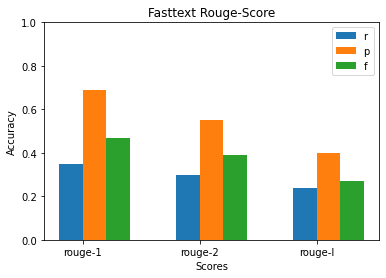

In [ ]:
#ploting Model Accuracy
r_scre=["rouge-1","rouge-2","rouge-l"]
accuracy=["P","R","F1"]
w=0.2

precision=[0.33,0.21,0.13]
Recall=[0.35,0.30,0.24]
F1_score=[0.47,0.39,0.27]
bar1=np.arange(len(r_scre))

bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]
plt.bar(bar1,Recall,w,label="r")
plt.bar(bar2,precision,w,label="p")

plt.bar(bar3,F1_score,w,label="f")

plt.xlabel("Scores")

plt.ylabel("Accuracy")
plt.xticks(bar1+w/2,r_scre)
plt.title("Fasttext Rouge-Score")
plt.legend()
plt.ylim(0.0,1.0)
plt.show()

In [ ]:
print("Rouge scores for  K-means Clustering generated summary")
Rouge_Score_kmeans

Rouge scores for  K-means Clustering generated summary


[{'rouge-1': {'f': 0.07328244093588956,
   'p': 0.36363636363636365,
   'r': 0.04074702886247878},
  'rouge-2': {'f': 0.02622169053845546,
   'p': 0.11956521739130435,
   'r': 0.014725568942436412},
  'rouge-l': {'f': 0.033587784447339994,
   'p': 0.16666666666666666,
   'r': 0.01867572156196944}}]